# N Advanced Matplotlib Functions You Must Know To Create Killer Visuals
## Subtitle TODO

![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
Photo by <a href="https://unsplash.com/@joycoast?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joycoast Wood Watches & Sunglasses</a> on <a href="https://unsplash.com/s/photos/men%20in%20suit?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
      </strong>
</figcaption>

# Setup

In [1]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import shap
import umap
import umap.plot
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

# Intro

# rcParams

```python
rcParams['figure.figsize'] = 8, 6
rcParams['legend.fontsize'] = "large"
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 1
```

In [27]:
from matplotlib import rcParamsDefault

# Get_* functions

['get_adjustable',
 'get_agg_filter',
 'get_alpha',
 'get_anchor',
 'get_animated',
 'get_aspect',
 'get_autoscale_on',
 'get_autoscalex_on',
 'get_autoscaley_on',
 'get_axes_locator',
 'get_axisbelow',
 'get_box_aspect',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_contains',
 'get_cursor_data',
 'get_data_ratio',
 'get_default_bbox_extra_artists',
 'get_facecolor',
 'get_fc',
 'get_figure',
 'get_frame_on',
 'get_geometry',
 'get_gid',
 'get_gridspec',
 'get_images',
 'get_in_layout',
 'get_label',
 'get_legend',
 'get_legend_handles_labels',
 'get_lines',
 'get_navigate',
 'get_navigate_mode',
 'get_path_effects',
 'get_picker',
 'get_position',
 'get_rasterization_zorder',
 'get_rasterized',
 'get_renderer_cache',
 'get_shared_x_axes',
 'get_shared_y_axes',
 'get_sketch_params',
 'get_snap',
 'get_subplotspec',
 'get_tightbbox',
 'get_title',
 'get_transform',
 'get_transformed_clip_path_and_affine',
 'get_url',
 'get_visible',
 'get_window_extent',
 'g

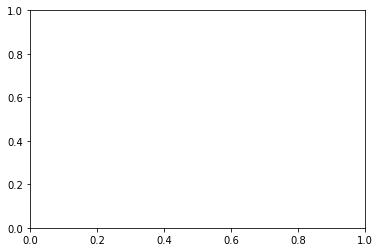

In [29]:
fig, ax = plt.subplots()

[func for func in dir(ax) if func.startswith("get")]

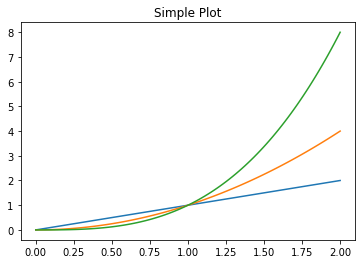

In [41]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.

l1 = ax.plot(x, x, label="linear")
l2 = ax.plot(x, x ** 2, label="quadratic")
l3 = ax.plot(x, x ** 3, label="cubic")

ax.set_title("Simple Plot")

plt.show()

# getp / setp

In [ ]:
plt.getp(l2)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #ff7f0e
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0.        , 0.02020202, 0.04040404, 0.0606...
    drawstyle or ds = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    in_layout = True
    label = quadratic
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #ff7f0e
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #ff7f0e
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[0.00000000e+00, 0.00000000e+00],     ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
 

# Legends

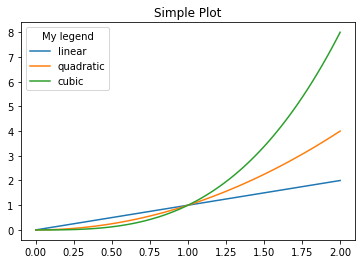

In [49]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.

l1 = ax.plot(x, x, label="linear")
l2 = ax.plot(x, x ** 2, label="quadratic")
l3 = ax.plot(x, x ** 3, label="cubic")

ax.set_title("Simple Plot")

ax.legend(title="My legend")

plt.show()

# cycler

In [59]:
from cycler import cycler

c1 = cycler(arg1=[1, 2, 3, 4])
c1

1
2
3
4


In [60]:
c2 = cycler(arg2=list("rgba"))
c2

'r'
'g'
'b'
'a'


In [61]:
c1 + c2

1,'r'
2,'g'
3,'b'
4,'a'


In [82]:
line_prop_cycler = (
    cycler(color=list("rgcy"))
    + cycler(ls=["-", "--", "-.", ":"])
    + cycler(lw=[3, 6, 9, 12])
)

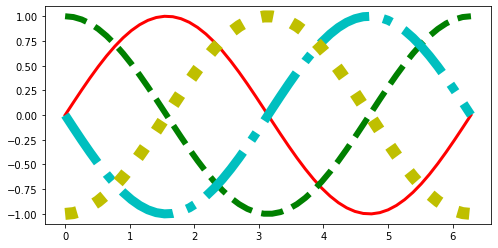

In [83]:
x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_prop_cycle(line_prop_cycler)  # Set propcycle before plotting
ax.plot(x, yy)

plt.show();

# tick_params

```python
>>> ax.tick_params()

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the axes, outside the axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
```

# Tickers

In [84]:
from matplotlib import ticker

In [87]:
dir(ticker)

['AutoLocator',
 'AutoMinorLocator',
 'EngFormatter',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'IndexFormatter',
 'IndexLocator',
 'Integral',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogFormatterSciNotation',
 'LogLocator',
 'LogitFormatter',
 'LogitLocator',
 'MaxNLocator',
 'MultipleLocator',
 'NullFormatter',
 'NullLocator',
 'OldAutoLocator',
 'OldScalarFormatter',
 'PercentFormatter',
 'ScalarFormatter',
 'StrMethodFormatter',
 'SymmetricalLogLocator',
 'TickHelper',
 '_DummyAxis',
 '_Edge_integer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_decade_greater',
 '_decade_greater_equal',
 '_decade_less',
 '_decade_less_equal',
 '_if_refresh_overridden_call_and_emit_deprec',
 '_log',
 'cbook',
 'is_close_to_int',
 'is_decade',
 'itertools',
 'locale',
 'logging',
 'math',
 'mpl',
 'mt

# Adding custom grids

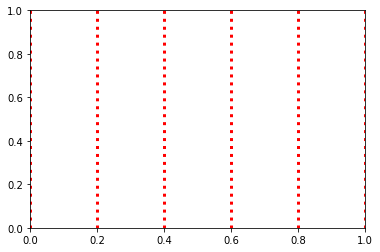

In [91]:
fig, ax = plt.subplots()

ax.grid(axis="x", linestyle=":", lw=3, color="r")

# plt.bar_label()

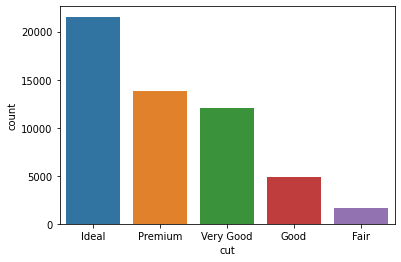

In [120]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")

ax = sns.countplot(diamonds["cut"])

In [121]:
ax.containers

[<BarContainer object of 5 artists>]

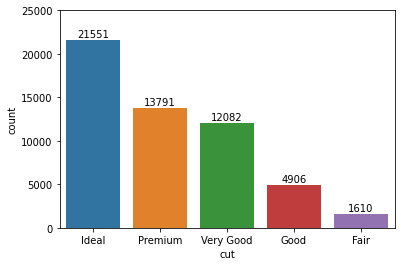

In [126]:
ax = sns.countplot(diamonds["cut"])
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 25000)
plt.show();

# zorder

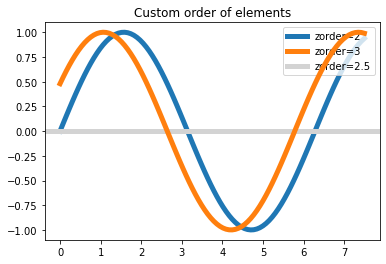

In [119]:
x = np.linspace(0, 7.5, 100)

plt.rcParams["lines.linewidth"] = 5

plt.plot(x, np.sin(x), label="zorder=2", zorder=2)  # bottom
plt.plot(x, np.sin(x + 0.5), label="zorder=3", zorder=3)
plt.axhline(0, label="zorder=2.5", color="lightgrey", zorder=2.5)

plt.title("Custom order of elements")

l = plt.legend(loc="upper right")
l.set_zorder(2.5)  # legend between blue and orange line

plt.show()

# Summary